In [61]:
#pandas numpy
import pandas as pd
import numpy as np
from numpy import mean

#sklearn
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#imblearn for imbalanced data
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

#matplotlib
import matplotlib.pyplot as plt

#counters
from collections import Counter

#others (os, graphwiz, excels)
import graphviz 
import os
import xlrd
import openpyxl

In [62]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\huyho\\OneDrive\\Desktop\\stuff\\student-c'

In [63]:
path = os.path.join(current_dir, "RFEP Worksheet Fall20-21 Sample.xlsx")

In [64]:
el_monitoring_df = pd.read_csv('elmonitoring.csv')
el_monitoring_df.head()

,Student ID,Last Name,First Name,Middle Name,Current Grade Level,Internal Student ID,Date Entered,Oral Comprehension (Listening),Oral communication skills,Reading comprehension,...,Participates in classroom discussions,Completes written assignments,Works independently,Asks for help when needed,Interventions/modifications utilized with student and impact?,What additional support does this student need?,How can these recommendations be accomplished?,Course Long Name,First Name.1,Last Name.1
0,13593,LastName01,FirstName01,Mddle01,11,5524,06-09-2021,5.0,5.0,3.0,...,3.0,3.0,3.0,4.0,Directions and expectations orally repeated.,NaN,NaN,English III,TeacherFirst,TeacherLast
1,12247,LastName02,FirstName02,Mddle02,11,1964,06-09-2021,3.0,4.0,3.0,...,2.0,2.0,3.0,3.0,NaN,NaN,NaN,English III,TeacherFirst,TeacherLast
2,92181,LastName03,FirstName03,Mddle03,11,4458,06-09-2021,5.0,5.0,3.0,...,3.0,3.0,3.0,3.0,Responds well to feedback and opportunities fo...,NaN,NaN,English III,TeacherFirst,TeacherLast
3,90277,LastName04,FirstName04,Mddle04,11,3461,06-09-2021,3.0,3.0,2.0,...,2.0,2.0,2.0,3.0,NaN,NaN,NaN,English III,TeacherFirst,TeacherLast
4,90298,LastName05,FirstName05,Mddle05,11,3485,06-09-2021,3.0,3.0,2.0,...,3.0,2.0,2.0,4.0,NaN,NaN,NaN,English III,TeacherFirst,TeacherLast


In [65]:
xls = pd.ExcelFile(path)
student_list_df = pd.read_excel(xls, sheet_name=1)
wpa_data_df = pd.read_excel(xls, sheet_name=2)
student_list_df.head()

,School Abbr,School Name,SN,SSID,Name,DOB,Grade,PriLangCode,PriLanguage,NDL,...,RFEP Eligible via ICA,RFEP Eligible if ICA?,WPA Date,WPAPerformanceLvl,RFEP Eligible via WPA,First Term Eng Grade,First Term Eng Class,First Term Store Code,Current GPA,RFEP Overall Eligible
0,DCP ECMS,Downtown College Prep Middle School,13371,2257212284,"Last, First 1",2009-08-05,6,60,Somali,NaN,...,No,No,NaT,NaN,No,B,Humanities 6,Q1,2.67,No
1,DCP ECMS,Downtown College Prep Middle School,14032,3058046796,"Last, First 2",2007-01-06,8,1,Spanish,NaN,...,No,No,NaT,NaN,No,A+,Humanities 8,Q1,4.00,No
2,DCP EPHS,Downtown College Prep,12289,7503957990,"Last, First 3",2005-03-11,10,1,Spanish,NaN,...,No,No,NaT,NaN,No,F,English II,P1,0.00,No
3,DCP ARHS,DCP Alum Rock High School,13289,2298814176,"Last, First 4",2006-11-01,9,1,Spanish,NaN,...,No,No,2020-10-15,3.0,No,A,English I,Q1,3.40,No
4,DCP ECMS,Downtown College Prep Middle School,12980,1527690431,"Last, First 5",2008-02-09,7,1,Spanish,NaN,...,No,No,NaT,NaN,No,A+,Humanities 7,Q1,3.33,No


In [66]:
print('# or rows: ', len(student_list_df))
print('# of Eligible Students: ', len(student_list_df[student_list_df['RFEP Overall Eligible'] == 'Yes']))
print('proportions :', 12/641)

# or rows:  641
# of Eligible Students:  12
proportions : 0.0187207488299532


In [67]:
#look at the columns to see what features we can use
student_list_df.columns

Index(['School Abbr', 'School Name', 'SN', 'SSID', 'Name', 'DOB', 'Grade',
       'PriLangCode', 'PriLanguage', 'NDL', '18-19 Overall ELPAC',
       '18-19 NWEA Date', 'Oral Level', 'Written Level', 'Listening',
       'Speaking', 'Reading', 'Writing', '19-20 Overall ELPAC',
       '20-21 Fall NWEA Date', '20-21 Fall NWEA RIT',
       '20-21 Fall NWEA Eligible', 'RFEP Eligible via NWEA',
       'RFEP Eligible if NWEA?', '20-21 ICA ELA Date',
       '20-21 ICA ELA Scale Score', '20-21 ICA ELA Distance to Met',
       'RFEP Eligible via ICA', 'RFEP Eligible if ICA?', 'WPA Date',
       'WPAPerformanceLvl', 'RFEP Eligible via WPA', 'First Term Eng Grade',
       'First Term Eng Class', 'First Term Store Code', 'Current GPA',
       'RFEP Overall Eligible'],
      dtype='object')

In [68]:
student_list_df['RFEP Overall Eligible']

0      No
1      No
2      No
3      No
4      No
       ..
636    No
637    No
638    No
639    No
640    No
Name: RFEP Overall Eligible, Length: 641, dtype: object

In [69]:
#seeing what columns to take for classification
#student_list_df['18-19 Overall ELPAC'].value_counts() #good
#student_list_df['20-21 ICA ELA Scale Score'].value_counts()  #too many null values 496
student_list_df.isna().sum()

School Abbr                        0
School Name                        0
SN                                 0
SSID                               0
Name                               0
DOB                                0
Grade                              0
PriLangCode                        0
PriLanguage                        0
NDL                              475
18-19 Overall ELPAC              167
18-19 NWEA Date                  167
Oral Level                         3
Written Level                      3
Listening                        167
Speaking                         167
Reading                          167
Writing                          167
19-20 Overall ELPAC              641
20-21 Fall NWEA Date             369
20-21 Fall NWEA RIT              369
20-21 Fall NWEA Eligible           0
RFEP Eligible via NWEA             0
RFEP Eligible if NWEA?             0
20-21 ICA ELA Date               496
20-21 ICA ELA Scale Score        496
20-21 ICA ELA Distance to Met    496
R

In [70]:
#change rfep overall eligible from Yes -> 1 and No -> 0
student_list_df['RFEP Overall Eligible'] = student_list_df['RFEP Overall Eligible'].replace({'Yes': 1, 'No': 0})
        

In [71]:
x = student_list_df[['Oral Level', 'Written Level', 'Listening', 'Speaking', 'Reading', 'Writing' , 'Current GPA', '18-19 Overall ELPAC']]
y = student_list_df['RFEP Overall Eligible']

In [72]:
x = x.fillna(0)

In [73]:
x = x.values
y = y.values

In [74]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25)
len(xtest)

161

In [75]:
svc = svm.SVC(kernel='linear')
svc.fit(x , y)

SVC(kernel='linear')

In [76]:
score = svc.score(xtrain, ytrain)
print('Score:', score)

Score: 0.9791666666666666


In [77]:
ypred = svc.predict(xtest)

In [78]:
ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [79]:


print("Accuracy: ", metrics.accuracy_score(ytest, ypred))

Accuracy:  0.9875776397515528


In [80]:
xtrain

array([[1.  , 1.  , 1.  , ..., 1.  , 4.  , 1.  ],
       [4.  , 1.  , 2.  , ..., 2.  , 1.  , 3.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 2.67, 0.  ],
       ...,
       [3.  , 2.  , 2.  , ..., 2.  , 2.33, 2.  ],
       [3.  , 1.  , 2.  , ..., 2.  , 0.75, 2.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 1.75, 0.  ]])

In [81]:
prediction = svc.predict([[4,4,4,4,4,4,4, 4]])
prediction 
#wont work because it predicts 0 for pretty much everything

array([0], dtype=int64)

In [82]:
student_list_df['RFEP Overall Eligible'].value_counts()

0    629
1     12
Name: RFEP Overall Eligible, dtype: int64

In [83]:
dectree = DecisionTreeClassifier()

dectree = dectree.fit(xtrain, ytrain)

In [84]:
y_pred_dectree = dectree.predict(xtest)

In [85]:
print("Accuracy:", metrics.accuracy_score(ytest, y_pred_dectree))

Accuracy: 0.9813664596273292


[Text(172.32352941176472, 205.35999999999999, 'X[7] <= 3.5\ngini = 0.041\nsamples = 480\nvalue = [470, 10]'),
 Text(152.62941176470588, 181.2, 'gini = 0.0\nsamples = 425\nvalue = [425, 0]'),
 Text(192.01764705882354, 181.2, 'X[6] <= 3.685\ngini = 0.298\nsamples = 55\nvalue = [45, 10]'),
 Text(128.01176470588237, 157.04, 'X[6] <= 0.725\ngini = 0.201\nsamples = 44\nvalue = [39, 5]'),
 Text(78.7764705882353, 132.88, 'X[6] <= 0.685\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(59.082352941176474, 108.72, 'X[1] <= 2.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(39.38823529411765, 84.56, 'X[6] <= 0.335\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(19.694117647058825, 60.400000000000006, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(59.082352941176474, 60.400000000000006, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(78.7764705882353, 84.56, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(98.47058823529412, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Tex

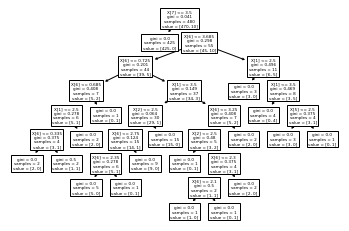

In [86]:
tree.plot_tree(dectree)

In [87]:
"""da = tree.export_graphviz(dectree, out_file=None)
graph = graphviz.Source(da)
graph.render('c:\\Users\\huyho\\OneDrive\\Desktop\\student-c\\test')"""

"da = tree.export_graphviz(dectree, out_file=None)\ngraph = graphviz.Source(da)\ngraph.render('c:\\Users\\huyho\\OneDrive\\Desktop\\student-c\\test')"

In [88]:
over = SMOTE(sampling_strategy=0.1) #oversample the minority class to 1:10 ratio
under = RandomUnderSampler(sampling_strategy=0.2) #undersample the majority class to a 1:2 ratio
steps = [('over', over), ('under', under)]
pipeline = Pipeline(steps=steps)
x, y = pipeline.fit_resample(x, y)

In [89]:
len(x)


372

In [90]:
counter0 = 0
counter1 = 0
for i in y:
    if i == 0:
        counter0 += 1
    elif i == 1:
        counter1 += 1
print("0 classes: ", counter0)
print("1 classes: ", counter1)
    

0 classes:  310
1 classes:  62


In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
scaler = StandardScaler()

In [93]:
x_scaled = scaler.fit_transform(x)

In [94]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25)

In [95]:
svc = svm.SVC(kernel='linear')
svc.fit(xtrain , ytrain)

SVC(kernel='linear')

In [96]:
score = svc.score(xtrain, ytrain)
print('Score:', score)
ypred = svc.predict(xtest)
ypred

Score: 0.9605734767025089


array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1], dtype=int64)

In [97]:
print("Accuracy: ", metrics.accuracy_score(ytest, ypred))

Accuracy:  0.9354838709677419


In [98]:
#making a predictions
#'Oral Level', 'Written Level', 'Listening', 'Speaking', 'Reading', 'Writing' , 'Current GPA', '18-19 Overall ELPAC'
prediction = svc.predict([[5,5,5,5,5,5,4,4]])
prediction

array([1], dtype=int64)

In [99]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96        73
           1       0.94      0.75      0.83        20

    accuracy                           0.94        93
   macro avg       0.94      0.87      0.90        93
weighted avg       0.94      0.94      0.93        93



In [100]:
#work on decision trees, naives bayes, etc in the morning

In [101]:
#dec trees
dec_tree_model = tree.DecisionTreeClassifier()
dec_tree_model = dec_tree_model.fit(xtrain, ytrain)

In [102]:
dec_tree_score = dec_tree_model.score(xtrain, ytrain)
print('Score:', dec_tree_score)
ypred_dectree = dec_tree_model.predict(xtest)
ypred_dectree

Score: 0.996415770609319


array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1], dtype=int64)

In [103]:
print("Accuracy: ", metrics.accuracy_score(ytest, ypred_dectree))

Accuracy:  0.946236559139785


In [104]:
print(classification_report(ytest, ypred_dectree))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        73
           1       0.94      0.80      0.86        20

    accuracy                           0.95        93
   macro avg       0.94      0.89      0.92        93
weighted avg       0.95      0.95      0.94        93



In [105]:
text_representation = tree.export_text(dec_tree_model)
print(text_representation)

|--- feature_7 <= 3.50
|   |--- class: 0
|--- feature_7 >  3.50
|   |--- feature_1 <= 2.01
|   |   |--- feature_6 <= 0.89
|   |   |   |--- feature_6 <= 0.34
|   |   |   |   |--- class: 0
|   |   |   |--- feature_6 >  0.34
|   |   |   |   |--- class: 1
|   |   |--- feature_6 >  0.89
|   |   |   |--- class: 0
|   |--- feature_1 >  2.01
|   |   |--- feature_6 <= 3.54
|   |   |   |--- feature_1 <= 3.16
|   |   |   |   |--- feature_1 <= 2.93
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  2.93
|   |   |   |   |   |--- feature_6 <= 2.25
|   |   |   |   |   |   |--- feature_6 <= 0.72
|   |   |   |   |   |   |   |--- feature_6 <= 0.69
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_6 >  0.69
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_6 >  0.72
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_6 >  2.25
|   |   |   |   |   |   |--- feature_6 <= 3.13
|   |   |   |   |   |  

In [106]:
x

array([[0.        , 0.        , 0.        , ..., 0.        , 1.67      ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 4.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 2.5       ,
        0.        ],
       ...,
       [4.        , 3.31174449, 2.        , ..., 2.        , 3.68825551,
        4.        ],
       [4.        , 2.56121618, 3.        , ..., 2.56121618, 3.68683649,
        4.        ],
       [4.        , 3.        , 2.63266878, ..., 2.63266878, 3.81019937,
        4.        ]])

In [107]:
#try majority vote/ensemble of many

In [112]:
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [113]:
e_svc = svm.SVC(kernel='linear')
e_dectree = tree.DecisionTreeClassifier()
e_NB = GaussianNB()
e_rf = RandomForestClassifier()
e_ada = AdaBoostClassifier()

ensemble = VotingClassifier(estimators=[('svc', e_svc), ('dectree', e_dectree), 
                                        ('NB', e_NB), ('RF', e_rf), ('Ada', e_ada)], voting='hard') #voting ='soft' will use probabilities (might use later?)

In [114]:
ensemble.fit(xtrain, ytrain)

VotingClassifier(estimators=[('svc', SVC(kernel='linear')),
                             ('dectree', DecisionTreeClassifier()),
                             ('NB', GaussianNB()),
                             ('RF', RandomForestClassifier()),
                             ('Ada', AdaBoostClassifier())])

In [115]:
for model in (e_svc, e_dectree, e_NB, e_rf, e_ada, ensemble):
    model.fit(xtrain, ytrain)
    y_predictions = model.predict(xtest)
    print(model.__class__.__name__, metrics.accuracy_score(ytest, y_predictions))

SVC 0.9354838709677419
DecisionTreeClassifier 0.946236559139785
GaussianNB 0.946236559139785
RandomForestClassifier 0.967741935483871
AdaBoostClassifier 0.967741935483871
VotingClassifier 0.978494623655914


In [116]:
from sklearn.model_selection import cross_val_score

alist = []
alist.append(cross_val_score(e_svc, x, y, scoring='accuracy', cv=5).mean())
alist.append(cross_val_score(e_dectree, x, y, scoring='accuracy', cv=5).mean())
alist.append(cross_val_score(e_NB, x, y, scoring='accuracy', cv=5).mean())
alist.append(cross_val_score(e_rf, x, y, scoring='accuracy', cv=5).mean())
alist.append(cross_val_score(e_ada, x, y, scoring='accuracy', cv=5).mean())

In [117]:
print(np.array(alist))

[0.93542342 0.9381982  0.92731532 0.96241441 0.94900901]


In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [55]:
ada = AdaBoostClassifier()
ada = ada.fit(xtrain, ytrain)

In [56]:
ada_score = ada.score(xtrain, ytrain)
print('Score:', ada_score)
ypred_ada = ada.predict(xtest)
ypred_ada

Score: 0.996415770609319


array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0], dtype=int64)

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rf = RandomForestClassifier()
rf = rf.fit(xtrain, ytrain)

In [60]:
rf_score = rf.score(xtrain, ytrain)
print('Score:', rf_score)
ypred_rf = rf.predict(xtest)
ypred_rf

Score: 1.0


array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0], dtype=int64)